In [1]:
seed = 42  # for reproducibility

import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))


In [6]:
exp_path = Path().absolute().parent.parent.joinpath('experiments/0004_UResNet_small_BC')
exp_path = Path().absolute().parent.parent.joinpath('experiments/0006_ResNet3D_18_K400_augmentation')
exp_path = Path().absolute().parent.parent.joinpath('experiments/0008_ResNet3D_18_K400_withaugmentation_BC_1ch')
exp_path = Path().absolute().parent.parent.joinpath('experiments/0011_ResNet3D_18_K400_BC_1ch_federated_test_crossval_noaug')
exp_path = Path().absolute().parent.parent.joinpath('experiments/0021_ResNet3D_18_K400_BC_1ch_federated_ACDC')

In [7]:
pickle_file = 'variables/log.pkl'
with open(exp_path.joinpath(pickle_file), 'rb') as handle:
    train_val_losses = pickle.load(handle)

In [8]:
train_val_losses

{'final_train': [],
 'final_val': [],
 'final_accuracy_t': [],
 'final_accuracy_v': [],
 'Fold0_accuracy_T_<VirtualWorker id:ACDC #objects:0>': [0.5029083570750238,
  0.4880104463437797,
  0.4880104463437797,
  0.4880104463437797,
  0.4880104463437797,
  0.4880104463437797,
  0.4880104463437797,
  0.4880104463437797,
  0.4880104463437797,
  0.4880104463437797,
  0.4880104463437797,
  0.4880104463437797],
 'Fold0_accuracy_V_<VirtualWorker id:ACDC #objects:0>': [0.6981481481481482,
  0.7351851851851853,
  0.7351851851851853,
  0.7351851851851853,
  0.7351851851851853,
  0.7351851851851853,
  0.7351851851851853,
  0.7351851851851853,
  0.7351851851851853,
  0.7351851851851853,
  0.7351851851851853,
  0.7351851851851853]}

In [4]:
train_val_losses['Fold0_accuracy_T_<VirtualWorker id:ACDC #objects:0>']

In [5]:
# std_final_train = np.std(np.array(train_val_losses['final_train']), 0)
# std_final_val = np.std(np.array(train_val_losses['final_val']), 0)
# std_final_accuracy_t = np.std(np.array(train_val_losses['final_accuracy_t']), 0)
# std_final_accuracy_v = np.std(np.array(train_val_losses['final_accuracy_v']), 0)

In [8]:
# final_train = np.mean(np.array(train_val_losses['final_train']), 0)
# final_val = np.mean(np.array(train_val_losses['final_val']), 0)
# final_accuracy_t = np.mean(np.array(train_val_losses['final_accuracy_t']), 0)
# final_accuracy_v = np.mean(np.array(train_val_losses['final_accuracy_v']), 0)

In [12]:
steps = range(len(final_train))

In [13]:
train_performances = final_train #train_val_losses['train_losses']
val_performances = final_val #train_val_losses['val_losses']
train = np.array(train_performances)#[1:])
val = np.array(val_performances)#[1:])

In [14]:
train

array([0.87896567, 0.69435607, 0.67675382, 0.65844594, 0.67368242,
       0.65395383, 0.67762888, 0.67288372, 0.64477561, 0.64509175,
       0.63587478, 0.63177861, 0.6228721 , 0.62453672, 0.62821025,
       0.61648751, 0.61265095, 0.60552129, 0.59355195, 0.59726293,
       0.59426382, 0.57996555, 0.59004044, 0.58107023, 0.57368461,
       0.55751417, 0.56849256, 0.54514857, 0.55677902, 0.55924546,
       0.5426647 , 0.5546552 , 0.5535046 , 0.54119339, 0.54871408,
       0.57536013, 0.52099809, 0.53199484, 0.51504491, 0.52319936,
       0.50920783, 0.52215025, 0.4871973 , 0.51095264, 0.50068802,
       0.49315926, 0.45169495, 0.49428624, 0.49722133, 0.49437946])

In [15]:
y1,y2,x = train.squeeze()[:steps[-1]+1], val.squeeze()[:steps[-1]+1], steps

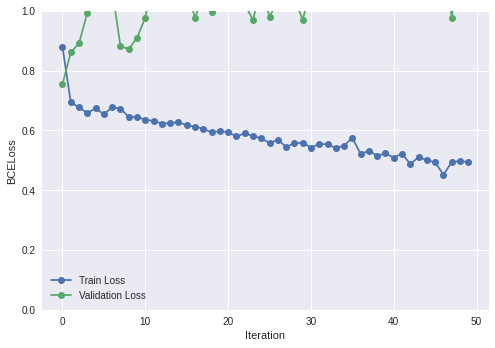

In [16]:
plt.plot(x,y1,'-o', label='Train Loss')
plt.plot(x,y2,'-o', label='Validation Loss')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.savefig(exp_path.joinpath('variables/learning_curve.png'))

In [17]:
train_performances = final_accuracy_t #train_val_losses['train_losses']
val_performances = final_accuracy_v #train_val_losses['val_losses']
train = np.array(train_performances)#[1:])
val = np.array(val_performances)#[1:])
y1,y2,x = train.squeeze()[:steps[-1]+1], val.squeeze()[:steps[-1]+1], steps

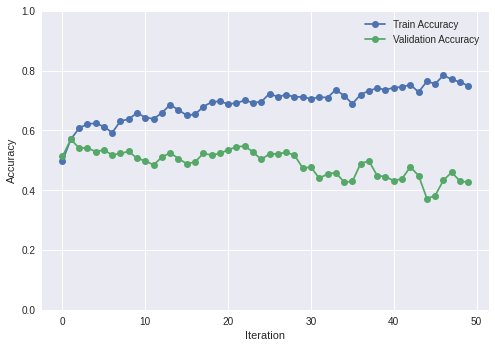

In [18]:
plt.plot(x,y1,'-o', label='Train Accuracy')
plt.plot(x,y2,'-o', label='Validation Accuracy')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.savefig(exp_path.joinpath('variables/learning_curve_accuracy.png'))